In [14]:
import pickle
import os

with open(os.path.join(os.getcwd(), "test.pkl"), 'rb') as file:
    test_file = pickle.load(file)

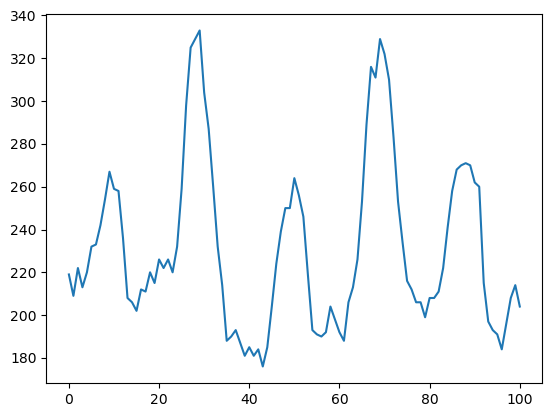

In [16]:
import matplotlib.pyplot as plt
import numpy as np

hist_counts_np = np.array(test_file)
fig, ax = plt.subplots()
x = range(len(test_file))
y = hist_counts_np[:, 2]

ax.plot(x,y)
plt.show()